In [14]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Netflix gives us an extensive set of files, each one containing different data regarding our use of their platform. The file Cover Sheet summarizes what data each table contains. The file ViewingActivity.csv has the data we need to analyze viewership.

We want to answer the questions:
- Which is the most common device for watching shows?
- What was the most-watched show?
- Who spent more time watching shows on the platform?
- What was the month in which the users watched the longest?

In [15]:
# Importing dataset
df = pd.read_csv('ViewingActivity.csv')

In [16]:
df.shape

(15516, 10)

In [19]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Profile4,2021-04-20 01:17:25,00:22:30,NaN,Demon Slayer: Kimetsu no Yaiba: Temporada 1: N...,NaN,Android DefaultWidevineL3Phone Android Phone,00:23:55,00:23:55,BR (Brazil)
1,Profile4,2021-04-20 00:44:40,00:23:27,NaN,Demon Slayer: Kimetsu no Yaiba: Temporada 1: K...,NaN,Android DefaultWidevineL3Phone Android Phone,00:23:37,00:23:37,BR (Brazil)
2,Profile4,2021-04-20 00:33:07,00:08:36,NaN,Demon Slayer: Kimetsu no Yaiba: Temporada 1: T...,NaN,Android DefaultWidevineL3Phone Android Phone,00:23:37,00:23:37,BR (Brazil)
3,Profile4,2021-04-19 18:03:46,00:00:41,Autoplayed: user action: None;,Sword Art Online_hook_primary_16x9,HOOK,Netflix Windows App - Cadmium Windows Mobile,00:00:00,00:00:00,BR (Brazil)
4,Profile4,2021-04-19 17:16:02,00:12:33,NaN,Demon Slayer: Kimetsu no Yaiba: Temporada 1: T...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:13:52,Not latest view,BR (Brazil)


In [20]:
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

Some columns are specific to user interaction with the video player and do not represent significant data for the analysis we are performing here. The column Attributes, for instance, gives us details about how the user interacted with the content (i.e., the user visualized the series page). Again, information regarding each column is available in the file Cover sheet.pdf. Because these columns will not help us answer our target questions, we will drop them.

In [21]:
df.drop(['Attributes', 'Supplemental Video Type', 'Bookmark', 'Latest Bookmark'], axis=1, inplace=True)

In [22]:
df.head()

,Profile Name,Start Time,Duration,Title,Device Type,Country
0,Profile4,2021-04-20 01:17:25,00:22:30,Demon Slayer: Kimetsu no Yaiba: Temporada 1: N...,Android DefaultWidevineL3Phone Android Phone,BR (Brazil)
1,Profile4,2021-04-20 00:44:40,00:23:27,Demon Slayer: Kimetsu no Yaiba: Temporada 1: K...,Android DefaultWidevineL3Phone Android Phone,BR (Brazil)
2,Profile4,2021-04-20 00:33:07,00:08:36,Demon Slayer: Kimetsu no Yaiba: Temporada 1: T...,Android DefaultWidevineL3Phone Android Phone,BR (Brazil)
3,Profile4,2021-04-19 18:03:46,00:00:41,Sword Art Online_hook_primary_16x9,Netflix Windows App - Cadmium Windows Mobile,BR (Brazil)
4,Profile4,2021-04-19 17:16:02,00:12:33,Demon Slayer: Kimetsu no Yaiba: Temporada 1: T...,Netflix Windows App - Cadmium Windows Mobile,BR (Brazil)


The column 'Start Time' tells us when the user started watching a given show. In its current format, its type is a string. We want to convert it to a proper date. Besides, since we are interested in the most watched month, we can filter even further and remove the time part of the date

In [23]:
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%Y-%m-%d %H:%M:%S', utc=True)

In [24]:
df.head()

,Profile Name,Start Time,Duration,Title,Device Type,Country
0,Profile4,2021-04-20 01:17:25+00:00,00:22:30,Demon Slayer: Kimetsu no Yaiba: Temporada 1: N...,Android DefaultWidevineL3Phone Android Phone,BR (Brazil)
1,Profile4,2021-04-20 00:44:40+00:00,00:23:27,Demon Slayer: Kimetsu no Yaiba: Temporada 1: K...,Android DefaultWidevineL3Phone Android Phone,BR (Brazil)
2,Profile4,2021-04-20 00:33:07+00:00,00:08:36,Demon Slayer: Kimetsu no Yaiba: Temporada 1: T...,Android DefaultWidevineL3Phone Android Phone,BR (Brazil)
3,Profile4,2021-04-19 18:03:46+00:00,00:00:41,Sword Art Online_hook_primary_16x9,Netflix Windows App - Cadmium Windows Mobile,BR (Brazil)
4,Profile4,2021-04-19 17:16:02+00:00,00:12:33,Demon Slayer: Kimetsu no Yaiba: Temporada 1: T...,Netflix Windows App - Cadmium Windows Mobile,BR (Brazil)


In [25]:
df.isnull().sum()

Profile Name    0
Start Time      0
Duration        0
Title           0
Device Type     0
Country         0
dtype: int64

We should also rename the 'Device Type' column to a more comprehensible name. Upon inspection, we notice that there are several types of devices, but they all come down to specific types: TV, browser, Xbox, PC, and Android

In [26]:
df['Device Type'].value_counts()

TCL 2K18 FHD UnionTV Smart TV                                            4488
Android DefaultWidevineL3Phone Android Phone                             4032
Netflix Windows App - Cadmium Windows Mobile                             1559
AOC AOC 2016 MT5800 with no FRC Smart TV                                 1360
Microsoft Xbox One X                                                      988
Panasonic 2017 TANBA11 TV Smart TV                                        894
Chrome PC (Cadmium)                                                       551
DefaultWidevineAndroidPhone                                               470
TCL 2K17 FHD TV NT63 Smart TV                                             416
Panasonic DTV 2014 sLD8A Smart TV                                         277
Android DefaultWidevineL3Phone Android Phone (Quantum_Quantum MUV UP)     211
Android DefaultWidevineL3Phone Android Phone (LENOVO_Lenovo K53b36)        76
Edge OSS - Windows (Cadmium)                                    

In [27]:
df.loc[df['Device Type'].str.contains('Chrome'), 'Device Type'] = 'Browser'
df.loc[df['Device Type'].str.contains('Firefox'), 'Device Type'] = 'Browser'
df.loc[df['Device Type'].str.contains('Edge'), 'Device Type'] = 'Browser'
df.loc[df['Device Type'].str.contains('Opera'), 'Device Type'] = 'Browser'
df.loc[df['Device Type'].str.contains('Android'), 'Device Type'] = 'Android'
df.loc[df['Device Type'].str.contains('Windows'), 'Device Type'] = 'Windows'
df.loc[df['Device Type'].str.contains('TV'), 'Device Type'] = 'TV'
df.loc[df['Device Type'].str.contains('Xbox'), 'Device Type'] = 'Xbox'

In [28]:
df.head()

,Profile Name,Start Time,Duration,Title,Device Type,Country
0,Profile4,2021-04-20 01:17:25+00:00,00:22:30,Demon Slayer: Kimetsu no Yaiba: Temporada 1: N...,Android,BR (Brazil)
1,Profile4,2021-04-20 00:44:40+00:00,00:23:27,Demon Slayer: Kimetsu no Yaiba: Temporada 1: K...,Android,BR (Brazil)
2,Profile4,2021-04-20 00:33:07+00:00,00:08:36,Demon Slayer: Kimetsu no Yaiba: Temporada 1: T...,Android,BR (Brazil)
3,Profile4,2021-04-19 18:03:46+00:00,00:00:41,Sword Art Online_hook_primary_16x9,Windows,BR (Brazil)
4,Profile4,2021-04-19 17:16:02+00:00,00:12:33,Demon Slayer: Kimetsu no Yaiba: Temporada 1: T...,Windows,BR (Brazil)


# Answering our questions

With the dataframe ready, we can answer our initial questions

## Which is the most common device for watching shows?

Since we already replaced the verbose names with shorter, more descriptive names, we can get the total count and plot a graph

In [29]:
df['Device Type'].value_counts()

TV         7484
Android    4830
Windows    1568
Xbox        988
Browser     646
Name: Device Type, dtype: int64

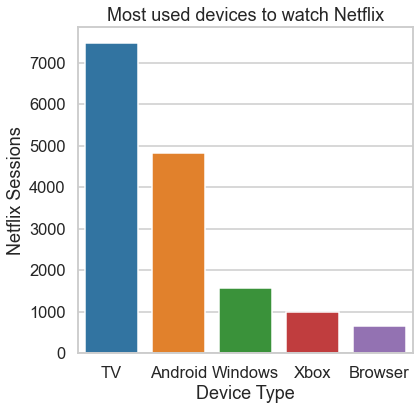

In [30]:
sns.set_style('whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(ax=ax, x='Device Type', data=df, order=df['Device Type'].value_counts().index)
ax.set_ylabel('Netflix Sessions')
ax.set_xlabel('Device Type')
ax.set_title('Most used devices to watch Netflix')
plt.show()

## Who spent more time watching shows on the platform?

Before verifying which profiles spent the most time on the platform by summing all values of the column 'Duration', we have to convert it to a format we can actually work with. In Python, we can sum time using timedelta.

In [31]:
import datetime

def convert_to_deltatime(time):
    hour, minute, second = time.split(':')
    return datetime.timedelta(hours=int(hour), minutes=int(minute), seconds=int(second))

In [32]:
time_df = df.copy()
time_df['Duration'] = time_df['Duration'].apply(convert_to_deltatime)

In [33]:
watch_time_days = time_df.groupby(by=['Profile Name'])['Duration'].sum().dt.days

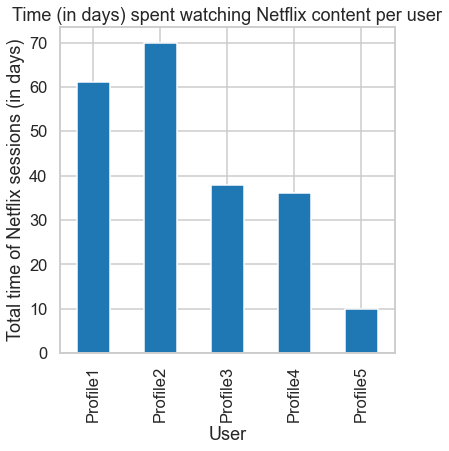

In [34]:
fig, ax = plt.subplots(figsize=(6,6))
watch_time_days.plot(kind='bar')
ax.set_ylabel('Total time of Netflix sessions (in days)')
ax.set_xlabel('User')
ax.set_title('Time (in days) spent watching Netflix content per user')
plt.show()

In [35]:
time_df.groupby(by=['Profile Name'])['Duration'].sum()

Profile Name
Profile1   61 days 21:53:48
Profile2   70 days 15:30:03
Profile3   38 days 00:15:55
Profile4   36 days 03:41:15
Profile5   10 days 04:07:42
Name: Duration, dtype: timedelta64[ns]

## What was the month in which the users watched the longest?

We will add another column to accomodate the specific month and year in which each Netflix session occurred.

In [36]:
time_df['Session_Month'] = time_df['Start Time'].dt.to_period('M')

C:\Users\pcteste1\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [37]:
monthly_watchtime = time_df.groupby(by=['Session_Month'])['Duration'].sum().dt.days

<AxesSubplot:title={'center':'Number of days watched per month'}, xlabel='Session_Month', ylabel='viewship (in days)'>

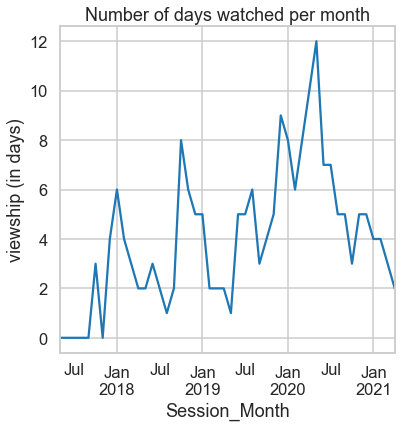

In [38]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_ylabel('viewship (in days)')
ax.set_xlabel('Period (in months)')
ax.set_title('Number of days watched per month')
monthly_watchtime.plot()

We observe a peak in 2020, when the pandemic began

## What was the most watched show?

Because titles may also indicate the season and episode to which a show belongs, we risk counting a show more than once. Therefore, we will remove the words after the first colon.

In [39]:
most_watched_df = df.copy()
most_watched_df['Title'] = most_watched_df['Title'].str.split(':').str[0]

In [40]:
most_watched_df.head()

,Profile Name,Start Time,Duration,Title,Device Type,Country
0,Profile4,2021-04-20 01:17:25+00:00,00:22:30,Demon Slayer,Android,BR (Brazil)
1,Profile4,2021-04-20 00:44:40+00:00,00:23:27,Demon Slayer,Android,BR (Brazil)
2,Profile4,2021-04-20 00:33:07+00:00,00:08:36,Demon Slayer,Android,BR (Brazil)
3,Profile4,2021-04-19 18:03:46+00:00,00:00:41,Sword Art Online_hook_primary_16x9,Windows,BR (Brazil)
4,Profile4,2021-04-19 17:16:02+00:00,00:12:33,Demon Slayer,Windows,BR (Brazil)


Observe that we have some rows in which the column Duration has less than five minutes. It may have happened for several reasons, but we understand that the show was not watched fully. Perhaps the user was exploring to get a feeling of the show. In any case, we will remove these rows using an arbitrary threshold.

The column 'Duration' also represents the duration in hours, so we need a conversion from string to time

In [41]:
df['Duration'] = pd.to_datetime(df['Duration'], format='%H:%M:%S')

In [42]:
most_watched_df['Title'][df['Duration'].dt.minute > 10].value_counts()

Vikings                              360
The Last Kingdom                     302
Breaking Bad                         242
Betty em Nova York                   214
Sou Luna                             207
                                    ... 
The Cloverfield Paradox                1
O Show de Truman - O Show da Vida      1
Lion - Uma jornada para casa           1
Tá Chovendo Hambúrguer                 1
Se enlouquecer, não se apaixone        1
Name: Title, Length: 990, dtype: int64

It seems Vikings was the most-watched show. The number is interesting because this series does not have 360 episodes; we have to remember that this count spans multiple profiles.
This comparison is also unfair because we would have to compare shows according to their categories to find which film was the most-watched, for example. The problem with the current approach is that series have more watch sessions than films, for example, simply because they are longer and have multiple episodes.